In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno #null data 쉽게 확인 가능

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.describe() # column별로 통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
for col in df_train.columns:
    msg='column {:<10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column PassengerId	 Percent of NaN value: 0.00%
column Survived  	 Percent of NaN value: 0.00%
column Pclass    	 Percent of NaN value: 0.00%
column Name      	 Percent of NaN value: 0.00%
column Sex       	 Percent of NaN value: 0.00%
column Age       	 Percent of NaN value: 19.87%
column SibSp     	 Percent of NaN value: 0.00%
column Parch     	 Percent of NaN value: 0.00%
column Ticket    	 Percent of NaN value: 0.00%
column Fare      	 Percent of NaN value: 0.00%
column Cabin     	 Percent of NaN value: 77.10%
column Embarked  	 Percent of NaN value: 0.22%


<AxesSubplot:>

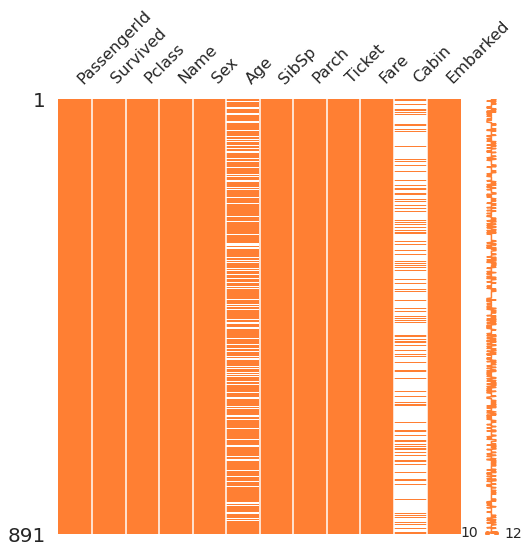

In [7]:
msno.matrix(df=df_train.iloc[:,:],figsize=[8,8], color=(1.0,0.5,0.2))

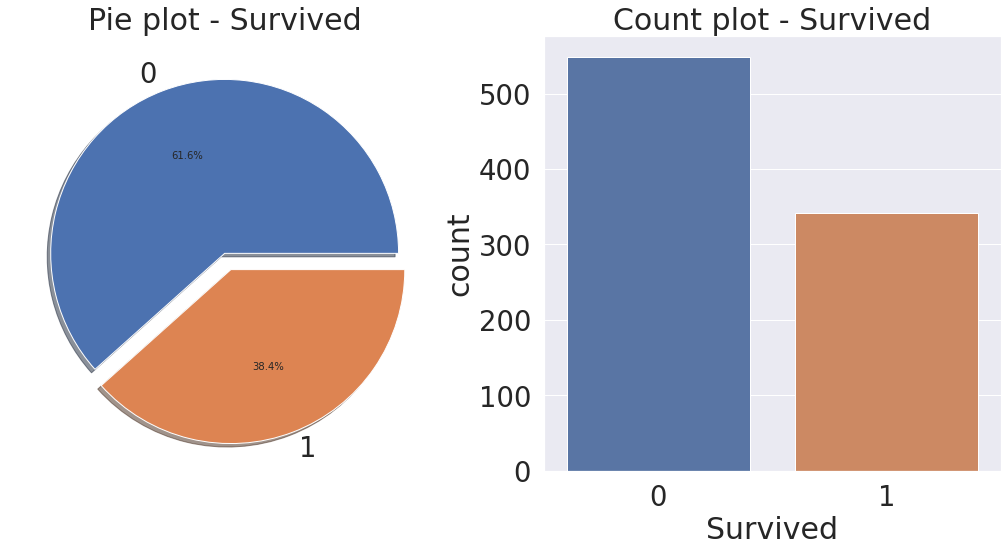

In [8]:
# 표 레이아웃 만듦
f, ax =plt.subplots(1,2,figsize=(18,8))

# Survived 데이터를  pie plot 방식으로, count plot으로 만들어 볼 것

# 왼쪽 표 .value_counts().plot.pie(파이디자인)
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# 오른쪽 표 countplot
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

# 만든 표 보여줌
plt.show()

2.1 Pclass

In [9]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [10]:
# Pclass별로 사람들의 수
df_train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
# Pclass 별로 살아남은 사람들의 수 (sum)

df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
# 여기서 1이 위에 sum이고 All이 count
# margin은 All이 있는지 없는지 차이
# cmap (color map)으로 색깔 변경 가능
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

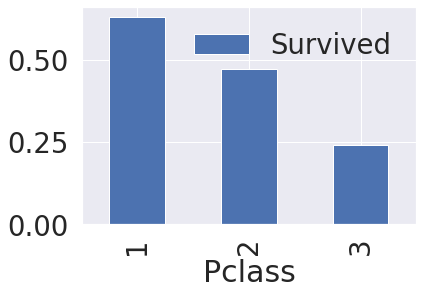

In [33]:
# 각 클래스별로 생존율 구해보기
# 하나의 그래프로 그리려면 as_index = True 해줘야 함
# ascending = False -> 내림차순
# bar() -> 막대 그래프

# class가 높을수록 생존율이 높은 것을 확인할 수 있음
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

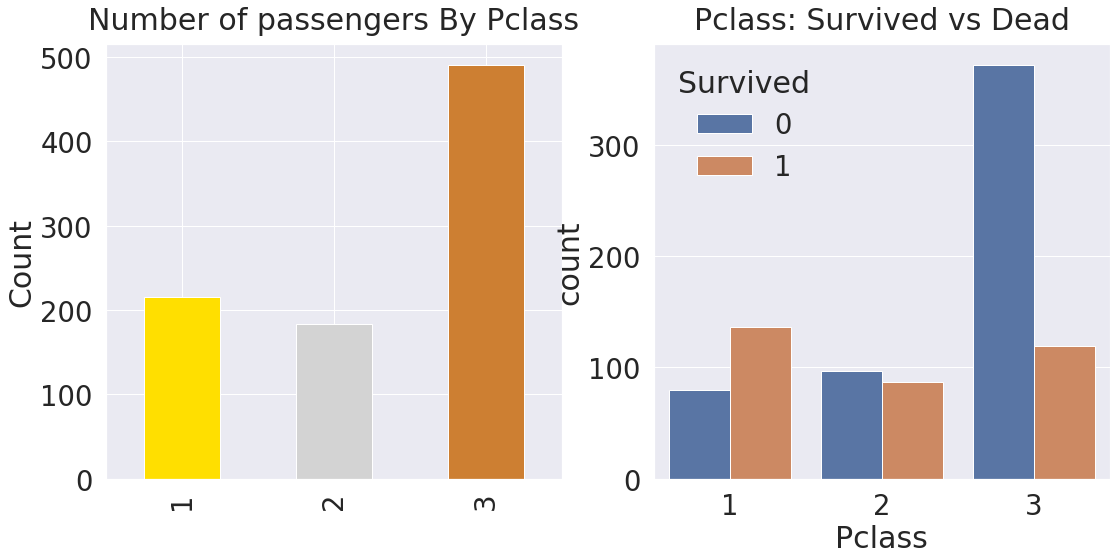

In [36]:
# 다른 방식으로 그래프로 표현하기
# 표 짜기
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18, 8))

# 왼쪽 표 만들기 (Pclass별 사람 수)
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

# 오른쪽 표 만들기 (pclass별 survived/dead 수 그래프로) Survived를 기준으로 hue 지정
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

# -> 마찬가지로 class가 높을 수록 생존확률이 높음 -> input으로 pclass를 사용하면 좋을 것임을 알 수 있음


2.2 Sex

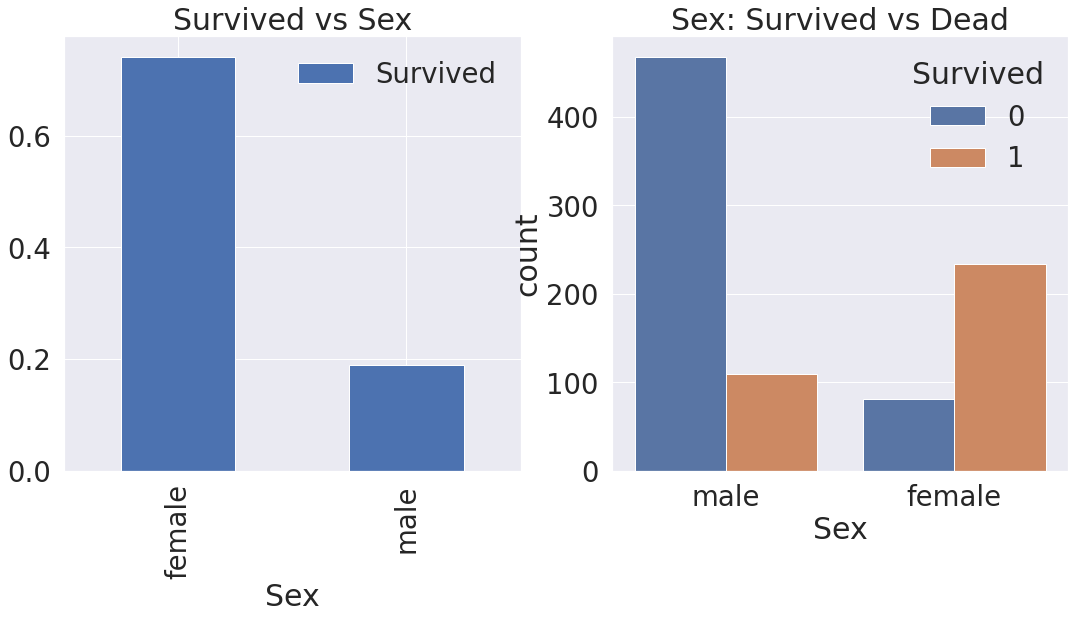

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex',"Survived"]].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18. 8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0,1], autopct='%1.1f')

SyntaxError: invalid syntax (<ipython-input-13-da5123901cbb>, line 1)